In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
# Import data
# People data
people = pd.read_csv("data/baseballdatabank-2022.2/core/People.csv")
batting = pd.read_csv("data/baseballdatabank-2022.2/core/Batting.csv")
pitching = pd.read_csv("data/baseballdatabank-2022.2/core/Pitching.csv")
salaries = pd.read_csv("data/baseballdatabank-2022.2/contrib/Salaries.csv")
teams = pd.read_csv("data/baseballdatabank-2022.2/core/Teams.csv")

# War data - Baseball Reference
war_bat = pd.read_csv('data/war-archive/war_daily_bat.txt', sep=",")
war_pitch = pd.read_csv('data/war-archive/war_daily_pitch.txt', sep=",")


In [24]:
# Show all columns in head()
pd.set_option('display.max_columns', None)

In [25]:
cols = ["playerID", "nameFirst", "nameLast", "nameGiven", "weight", "height", "bats", "throws", "debut","retroID", "bbrefID"]
# Filter
people = people[cols]
people.head()

# Create a new column for years played

,playerID,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,retroID,bbrefID
0,aardsda01,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,aardd001,aardsda01
1,aaronha01,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,aaroh101,aaronha01
2,aaronto01,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,aarot101,aaronto01
3,aasedo01,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,aased001,aasedo01
4,abadan01,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,abada001,abadan01


In [26]:
# Rename columns
batting = batting.rename(columns={"G": "games", "AB": "at_bats", "R": "runs", "H": "hits", "2B": "doubles", "3B": "triples", "HR": "home_runs", "RBI": "runs_batted_in", "SB": "stolen_bases", "CS": "caught_stealing", "BB": "walks", "SO": "strikeouts", "IBB": "intentional_walks", "HBP": "hit_by_pitch", "SH": "sacrifice_hits", "SF": "sacrifice_flies", "GIDP": "grounded_into_double_play"})
batting.head()

,playerID,year,stint,team,lgID,games,at_bats,runs,hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,walks,strikeouts,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,grounded_into_double_play
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [28]:
# Rename columns
pitching = pitching.rename(columns={"W": "wins", "L": "losses", "G": "games", "GS": "games_started", "CG": "complete_games", "SHO": "shutouts", "SV": "saves", "IPouts": "outs_pitched", "H": "hits_allowed", "ER": "earned_runs", "HR": "home_runs_allowed", "BB": "walks", "SO": "strikeouts", "BAOpp": "opponent_batting_average", "ERA": "earned_run_average", "IBB": "intentional_walks", "WP": "wild_pitches", "HBP": "hit_by_pitch", "BK": "balks", "BFP": "batters_faced", "GF": "games_finished", "R": "runs_allowed", "SH": "sacrifice_hits", "SF": "sacrifice_flies", "GIDP": "grounded_into_double_play"})
pitching.head()

,playerID,year,stint,team,lgID,wins,losses,games,games_started,complete_games,shutouts,saves,outs_pitched,hits_allowed,earned_runs,home_runs_allowed,walks,strikeouts,opponent_batting_average,earned_run_average,intentional_walks,wild_pitches,hit_by_pitch,balks,batters_faced,games_finished,runs_allowed,sacrifice_hits,sacrifice_flies,grounded_into_double_play
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [34]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.0,19.0,73.0,16.0,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.0,22.0,69.0,21.0,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.0,25.0,18.0,8.0,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.0,9.0,16.0,4.0,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.0,15.0,46.0,15.0,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [35]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


# WAR data

In [53]:
war_fan.head()

,Name,Team,plate_appearances,Innings_pitched,Bat WAR,Pit WAR,Total WAR,year
0,Al Rosen,CLE,688.0,NaN,9.1,NaN,9.1,1953
1,Duke Snider,BRO,680.0,NaN,8.8,NaN,8.8,1953
2,Eddie Mathews,MIL,681.0,NaN,8.7,NaN,8.7,1953
3,Robin Roberts,PHI,140.0,346.2,0.1,8.4,8.5,1953
4,Roy Campanella,BRO,590.0,NaN,7.7,NaN,7.7,1953


In [55]:
# Cols to keep
cols = ["name_common", "age", "player_ID", "year_ID", "team_ID", "WAR"]
# Remove all other columns from war_bat and war_pitch
war_bat = war_bat[cols]
# Renmae war in war_bat
war_bat =war_bat.rename(columns ={"WAR": "WAR_bat"})
war_pitch = war_pitch[cols]
war_ptich = war_pitch.rename(columns = {"WAR": "War_pit"})


war_bat.head()

,name_common,age,player_ID,year_ID,team_ID,WAR_bat
0,David Aardsma,22.0,aardsda01,2004,SFG,0.00
1,David Aardsma,24.0,aardsda01,2006,CHC,-0.04
2,David Aardsma,25.0,aardsda01,2007,CHW,0.00
3,David Aardsma,26.0,aardsda01,2008,BOS,-0.02
4,David Aardsma,27.0,aardsda01,2009,SEA,0.00


In [56]:
war_bat.shape

(119945, 6)

In [57]:
war_pitch.shape

(53884, 6)

In [58]:
# Merge war_bat and war_pitch by player_ID and year_ID
war = pd.merge(war_bat, war_pitch, on=["player_ID", "year_ID"])

In [59]:
war.shape

(62139, 10)

In [16]:
war_pitch.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,G,GS,IPouts,IPouts_start,IPouts_relief,RA,xRA,xRA_sprp_adj,xRA_extras_adj,xRA_def_pitcher,PPF,PPF_custom,xRA_final,BIP,BIP_perc,RS_def_total,runs_above_avg,runs_above_avg_adj,runs_above_rep,RpO_replacement,GR_leverage_index_avg,WAR,salary,teamRpG,oppRpG,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,ERA_plus,ER_lg
0,David Aardsma,22.0,430911.0,aardsda01,2004,SFG,1,NL,11,0,32,0.0,32.0,8,5.967,-0.440,NaN,-0.423,101,98.525,5.862,44.0,0.0093,-45.5,-2.138,-2.177,-1.199,0.203,1.0718,-0.15,300000.0,4.67092,4.86883,1.902,0.4803,-0.2167,-0.0298,4.75633,1.895,0.4914,0.0942,66.675000,5.334
1,David Aardsma,24.0,430911.0,aardsda01,2006,CHC,1,NL,45,0,159,0.0,159.0,25,28.172,-2.076,NaN,-0.367,103,104.018,27.526,147.0,0.0337,-10.9,2.526,2.751,7.388,0.211,0.7542,0.61,NaN,4.86675,4.80561,1.909,0.5060,0.2700,-0.1301,4.97303,1.919,0.4896,0.4682,114.295833,27.431
2,David Aardsma,25.0,430911.0,aardsda01,2007,CHW,1,AL,25,0,97,0.0,97.0,24,17.999,-1.343,NaN,-1.327,104,103.205,18.559,97.0,0.0206,-64.4,-5.441,-5.646,-1.814,0.218,1.4280,-0.40,387500.0,4.85895,5.08479,1.924,0.4782,-0.5450,-0.1990,5.00394,1.920,0.4859,0.3459,74.086957,17.040
3,David Aardsma,26.0,430911.0,aardsda01,2008,BOS,1,AL,47,0,146,0.0,146.0,32,26.131,-1.942,NaN,0.663,106,106.614,25.082,139.0,0.0317,20.9,-6.918,-7.757,-1.633,0.211,0.7972,-0.31,403250.0,4.70400,4.86905,1.904,0.4836,-0.7708,-0.0632,4.81624,1.901,0.4888,0.5205,83.796667,25.139
4,David Aardsma,27.0,430911.0,aardsda01,2009,SEA,1,AL,73,0,214,0.0,214.0,23,39.221,-2.895,NaN,3.136,95,93.595,31.064,181.0,0.0399,78.6,8.064,7.689,15.965,0.215,1.8922,1.69,419000.0,4.79788,4.69256,1.899,0.5105,0.7665,0.1577,4.90529,1.911,0.4894,0.7666,168.910000,33.782


# WAR data - Fangraph

In [52]:
# List all files in data/WARS folder and import them all
import os
import glob

path = 'data/WARS'
all_files = glob.glob(os.path.join(path, "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, header=0)
    # Add a column for the year
    df['year'] = filename[10:14]
    li.append(df)

war_fan = pd.concat(li, axis=0, ignore_index=True)
# Remove first column
war_fan = war_fan.drop(war_fan.columns[0], axis=1)
# Rename columns
war_fan = war_fan.rename(columns={ "PA": "plate_appearances", "IP": "Innings_pitched"})
war_fan.head()

# Save dataframes to csv
war_fan.to_csv('data/war_fangraph.csv', index=False)

<AxesSubplot: >

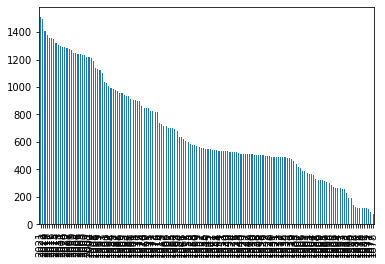

In [49]:
# plot Value counts for each year
war_fan['year'].value_counts().plot(kind='bar')